In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import csv
import random
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression

In [2]:
#read the fire data
fire = "../data_joao/forest_fire_1998-2017_new.csv"
fire_df = pd.read_csv(fire)
fire_df.head()

,Ano,State,Month,Number,Date
0,1998,AC,Jan,0,1/1/1998
1,1999,AC,Jan,0,1/1/1999
2,2000,AC,Jan,0,1/1/2000
3,2001,AC,Jan,0,1/1/2001
4,2002,AC,Jan,0,1/1/2002


In [3]:
# rename columns and select Legal Amazon states
new_fire_df = fire_df.rename(columns={"Ano":"year", "Number": "Number of Fires"})
new_fire_df = new_fire_df.drop(["Date", "Month"], axis=1)
legalAmz_fire = new_fire_df.loc[new_fire_df['State'].isin(["AC", "AM", "AP", "MA", "MT","RO", "PA", "RR", "TO"])]

In [4]:
fire_year_df = new_fire_df.groupby(["year"])
fire_year_df.head()

,year,State,Number of Fires
0,1998,AC,0
1,1999,AC,0
2,2000,AC,0
3,2001,AC,0
4,2002,AC,0
...,...,...,...
95,2013,AC,4
96,2014,AC,1
97,2015,AC,2
98,2016,AC,21


In [5]:
# groupby Year
numfires = fire_year_df.sum()["Number of Fires"]
fires_df = pd.DataFrame(numfires)

fires_df = fires_df.reset_index()
fires_df.to_csv("../output_data/fire_sum_year.csv",index=False)
fires_df

,year,Number of Fires
0,1998,123881
1,1999,132526
2,2000,97541
3,2001,137926
4,2002,220015
5,2003,208476
6,2004,248928
7,2005,224294
8,2006,123327
9,2007,206412


In [6]:
# axis and ticks
x_axis = list(fires_df.year)
tick_locations = [value for value in x_axis]

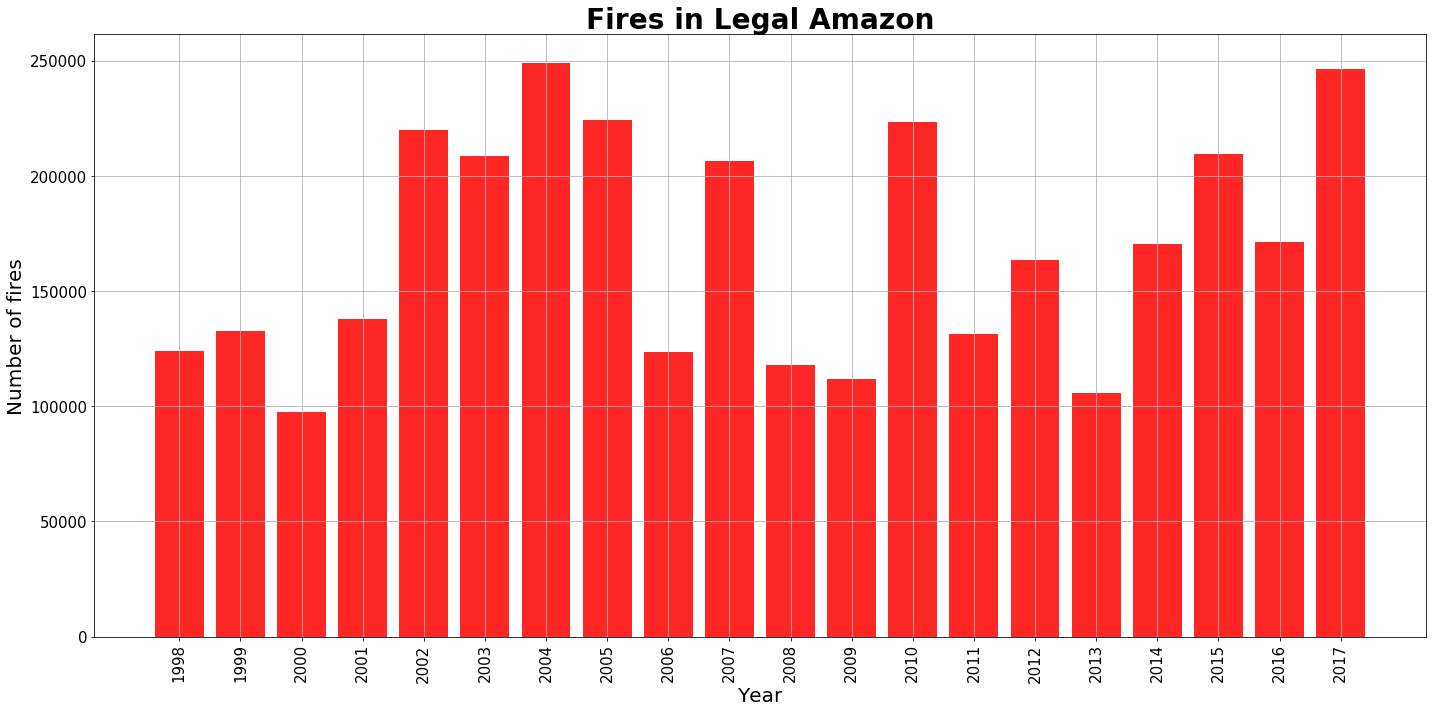

In [14]:
# Create a bar graph for Annual Fires in Legal Amazon.
fig, ax = plt.subplots(figsize=(20, 10))

for index, row in fires_df.iterrows():
    ax.bar(fires_df["year"][index], fires_df["Number of Fires"][index],  color='r', alpha=0.85, align="center")

ax.set_title("Fires in Legal Amazon", fontweight = "bold", fontsize = 28)
plt.xticks(tick_locations, x_axis, rotation=90)
plt.tick_params(labelsize=15)
ax.set_xlabel("Year", fontsize = 20)
ax.set_ylabel("Number of fires", fontsize = 20)
#plt.style.use('ggplot')
plt.tight_layout()
ax.grid()
#save figure
plt.savefig("../output_data/images/fires_legalAmazon.png", dpi=fig.dpi)
plt.show()

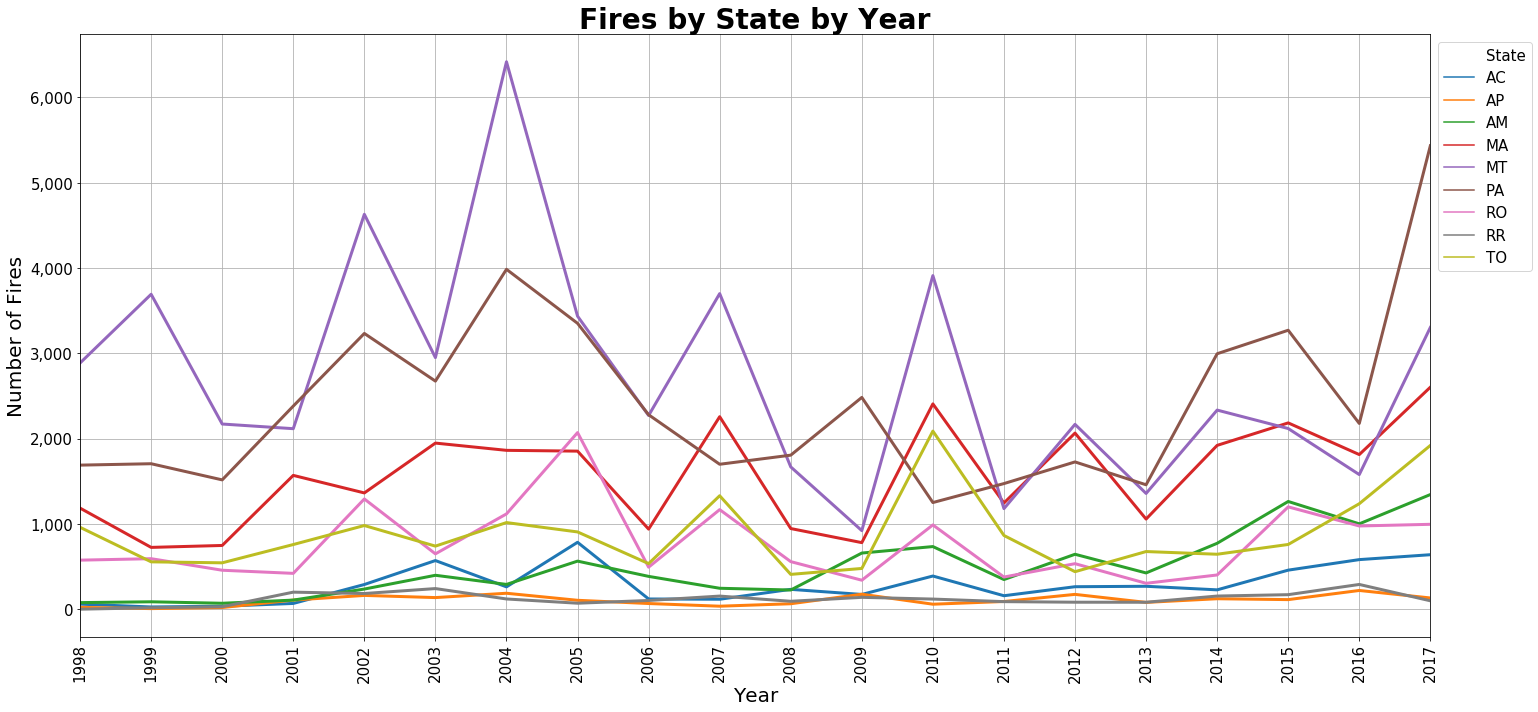

In [15]:
#create line graph Annual Deforestation by state

states = np.unique(legalAmz_fire["State"])
states

fig, ax = plt.subplots(figsize=(20, 10), )
ax = sns.lineplot(x = 'year', y = "Number of Fires", data = legalAmz_fire, hue = 'State', lw = 3, err_style = None,)
tick_locations = [value for value in x_axis]
handles = states
plt.xticks(tick_locations, x_axis, rotation=90)
plt.tick_params(labelsize=15)
ax.set_xlabel("Year", fontsize = 20)
ax.set_ylabel("Number of Fires", fontsize = 20)
ax.set_title('Fires by State by Year', fontweight = "bold", fontsize = 28)
ax.legend(handles, loc="best")

plt.tight_layout()
ax.grid()

ax.xaxis.set_major_locator(plt.MaxNLocator(19))
ax.set_xlim(1998, 2017)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=15)

plt.savefig("../output_data/images/fire_state_year.png.png")

plt.show()

In [9]:
# Group By State by Year
by_state = legalAmz_fire.groupby(["State", "year"])

state_sum = by_state.sum()["Number of Fires"]
state_sum_df = pd.DataFrame(state_sum)
state_sum_df = state_sum_df.reset_index()
state_sum_df.to_csv("../output_data/fire_state_year.csv",index=False)
state_sum_df.head(5)

,State,year,Number of Fires
0,AC,1998,730
1,AC,1999,333
2,AC,2000,434
3,AC,2001,828
4,AC,2002,3491


In [10]:
#create and save a dataframe with the mean by state
amazon_mean_df = pd.DataFrame(legalAmz_fire.groupby(["State"])["Number of Fires"].mean())
amazon_mean_df = amazon_mean_df.reset_index()
amazon_mean_df.to_csv("../output_data/fire_mean_state.csv")
amazon_mean_df

,State,Number of Fires
0,AC,285.962343
1,AM,491.493724
2,AP,105.087866
3,MA,1570.205021
4,MT,2738.870293
5,PA,2417.744770
6,RO,775.677824
7,RR,123.238494
8,TO,888.836820


In [11]:
state_mean1 = by_state.mean()["Number of Fires"]
state_mean1_df = pd.DataFrame(state_mean1)
state_mean1_df = state_mean1_df.reset_index()
state_mean1_df

,State,year,Number of Fires
0,AC,1998,60.833333
1,AC,1999,27.750000
2,AC,2000,36.166667
3,AC,2001,69.000000
4,AC,2002,290.916667
...,...,...,...
175,TO,2013,677.250000
176,TO,2014,645.666667
177,TO,2015,760.250000
178,TO,2016,1237.833333


['AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO']

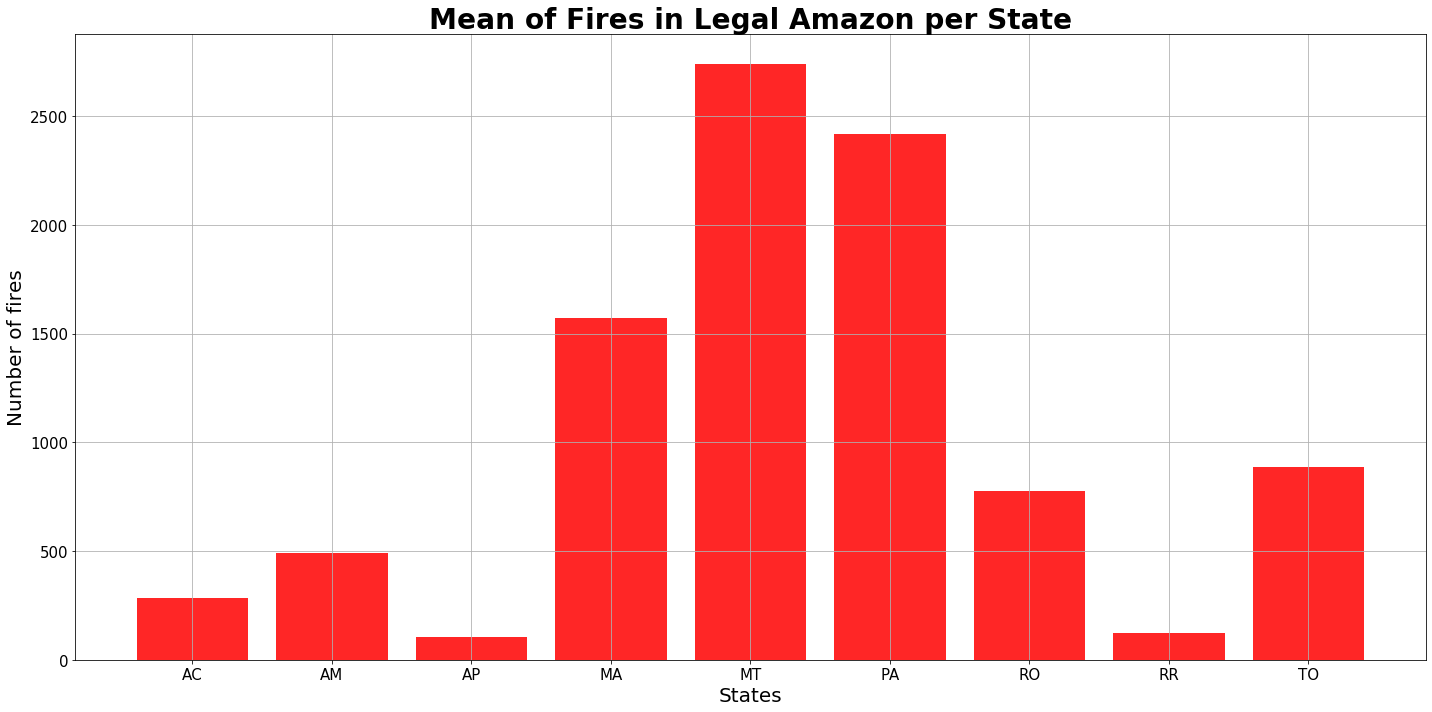

In [21]:
# Create a bar graph for the mean of fires by State in Legal Amazon.
# axis and ticks
x_axis = list(amazon_mean_df.State)
tick_locations = [value for value in x_axis]

fig, ax = plt.subplots(figsize=(20, 10))

for index, row in amazon_mean_df.iterrows():
    ax.bar(amazon_mean_df["State"][index], amazon_mean_df["Number of Fires"][index],  color='r', alpha=0.85, align="center")

ax.set_title("Mean of Fires in Legal Amazon per State", fontweight = "bold", fontsize = 28)
plt.xticks(tick_locations, xaxis)
plt.tick_params(labelsize=15)
ax.set_xlabel("States", fontsize = 20)
ax.set_ylabel("Number of fires", fontsize = 20)
plt.tight_layout()
ax.grid()
#save figure
plt.savefig("../output_data/images/fires_by_state.png", dpi=fig.dpi)
plt.show()